In [131]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import csv
import requests
import glob 
import os

In [5]:
from tqdm import tqdm

# Downloading the Data from API

In [9]:
URL = "https://www.federalregister.gov/developers/api/v1"

r = requests.get(URL)
print(r, r.status_code, r.ok)

print(r.content[:100])

<Response [200]> 200 True
b'<!DOCTYPE html><html><head><base href="/developers/api/"><title>Federal Register API API Documentati'


In [39]:
url = 'https://www.federalregister.gov/api/v1/documents.json'

term = ''
per_page = 1000

# Define the payload fields
payload = {'conditions[term]': term, 'per_page': per_page,}
r = requests.get(url,params=payload)

# Count the number of documents
n_documents = r.json()['count']
n_pages = r.json()['total_pages']

data = []

for n in tqdm(range(n_pages)):
    payload = {
        'per_page':per_page,
        'order':'newest',
        'conditions[term]': term,
        'fields[]': ['action', 'subtype', 'significant', 'document_number', 'publication_date', 'abstract', 'agency_names', 'agencies', 'title', 'topics', 'type', 'effective_on'],
        'page':n+1,
    }
        
    r = requests.get(url,params=payload)
    
    res = r.json()['results']
    data.extend(res)
    
    #print(res[0])    
    #print([x['title'][:50] for x in res[:5]])

100%|██████████| 10/10 [03:27<00:00, 21.40s/it]


In [40]:
temp_df = pd.DataFrame(data).set_index('document_number')
temp_df.to_csv('fed_reg_ALL.csv')
print(len(temp_df))
temp_df

10000


,abstract,action,agencies,agency_names,effective_on,publication_date,significant,subtype,title,topics,type
document_number,,,,,,,,,,,
2019-24827,The Department of Commerce (Commerce) is parti...,None,"[{'raw_name': 'DEPARTMENT OF COMMERCE', 'name'...","[Commerce Department, International Trade Admi...",None,2019-11-15,None,None,Certain Hardwood Plywood Products From the Peo...,[],Notice
2019-24810,None,None,[{'raw_name': 'ENVIRONMENTAL PROTECTION AGENCY...,[Environmental Protection Agency],None,2019-11-15,None,None,Environmental Impact Statements; Notice of Ava...,[],Notice
2019-24568,In compliance with the requirements of the Pap...,Notice of information collection and request f...,"[{'raw_name': 'DEPARTMENT OF ENERGY', 'name': ...","[Energy Department, Federal Energy Regulatory ...",None,2019-11-15,None,None,Commission Information Collection Activities (...,[],Notice
2019-24818,GSA intends to prepare an EIS to analyze the p...,Scoping announcement.,[{'raw_name': 'GENERAL SERVICES ADMINISTRATION...,[General Services Administration],None,2019-11-15,None,None,Notice of Intent To Prepare an Environmental I...,[],Notice
2019-24955,None,None,[{'raw_name': 'SECURITIES AND EXCHANGE COMMISS...,[Securities and Exchange Commission],None,2019-11-15,None,None,Sunshine Act Meetings,[],Notice
2019-24792,The U.S. Nuclear Regulatory Commission (NRC) i...,Gather information that would be used to deter...,"[{'raw_name': 'NUCLEAR REGULATORY COMMISSION',...",[Nuclear Regulatory Commission],None,2019-11-15,None,None,Agency Action Regarding the Exploratory Proces...,[],Notice
2019-24308,NMFS proposes to implement management measures...,Proposed rule; request for comments.,"[{'raw_name': 'DEPARTMENT OF COMMERCE', 'name'...","[Commerce Department, National Oceanic and Atm...",None,2019-11-15,False,None,"Fisheries of the Caribbean, Gulf of Mexico, an...","[Fisheries, Fishing, Fishing vessels, Foreign ...",Proposed Rule
2019-24775,None,None,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,"[Health and Human Services Department, Nationa...",None,2019-11-15,None,None,National Institute of Neurological Disorders a...,[],Notice
2019-24928,None,None,[{'raw_name': 'NATIONAL CREDIT UNION ADMINISTR...,[National Credit Union Administration],None,2019-11-15,None,None,Sunshine Act: Notice of Agency Meeting,[],Notice


In [91]:
print(f"Fraction with abstracts", 1 - df.abstract.isnull().mean())
ab = df.abstract.copy().dropna()
ab.str.len()

Fraction with abstracts 0.9019650183545671


document_number
2019-22705     913
2019-24138    1277
2019-24478     224
2019-23697     397
2019-23856     386
2019-23638     647
2019-21260    1244
2019-23468     189
2019-22684     251
2019-23061     163
2019-22920     337
2019-22537     719
2019-22896     404
2019-22763     274
2019-22653     490
2019-22156    1183
2019-20232     306
2019-21943    1022
2019-21852     541
2019-21368     265
2019-21822     282
2019-21412    3020
2019-21304     351
2019-21301     435
2019-21468    1598
2019-20045     301
2019-20099     362
2019-20100     568
2019-20329     535
2019-20229     912
              ... 
94-7684       1225
94-7777       1104
94-7569        205
94-7544        767
94-7234       1373
94-7187        871
94-6869       1094
94-6939        404
94-5975        797
94-5760        164
94-5313        785
94-4875       1081
94-4247       1300
94-4510       2262
94-4332        701
X94-10217     1138
94-3569        440
94-2027        451
94-3190        159
94-3216        374
94-2884        

In [87]:
ab.str.len().describe()

count     328.000000
mean      952.774390
std       690.702584
min       131.000000
25%       513.750000
50%       808.000000
75%      1176.250000
max      5792.000000
Name: abstract, dtype: float64

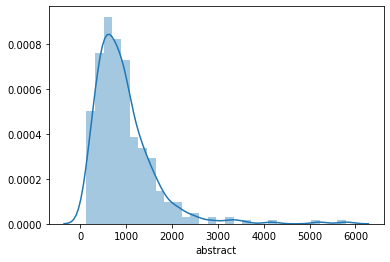

In [88]:
sns.distplot(ab.str.len())

# Creating new columns with the search terms and Compiling csv's into df

In [135]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_AI.csv')
csv_input['Search Term'] = 'Artificial Intelligence'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_AI.csv', index=False)

In [139]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_BD.csv')
csv_input['Search Term'] = 'Big Data'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_BD.csv', index=False)

In [140]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_BI.csv')
csv_input['Search Term'] = 'Business Intelligence'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_BI.csv', index=False)

In [141]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_DA.csv')
csv_input['Search Term'] = 'Data Analytics'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_DA.csv', index=False)

In [142]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_data_mine.csv')
csv_input['Search Term'] = 'Data Mining'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_data_mine.csv', index=False)

In [143]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_DS.csv')
csv_input['Search Term'] = 'Data Science'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_DS.csv', index=False)

In [144]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_ML.csv')
csv_input['Search Term'] = 'Machine Learning'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_ML.csv', index=False)

In [6]:
path = r'C:\Users\joeln\Google Drive\GitHub\DATA-601'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
master_df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
master_df = pd.read_pickle(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\master_df')

In [7]:
master_df.describe()

,document_number,abstract,action,agencies,agency_names,effective_on,publication_date,significant,subtype,title,topics,type,Search Term,agency_main
count,758,579,572,758,758,128,758,131,13,758,758,758,758,758
unique,638,461,184,118,113,103,539,2,3,489,82,5,7,60
top,2016-14175,The inventions listed below are owned by an ag...,Notice.,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,"['Health and Human Services Department', 'Nati...",2016-06-23 00:00:00,2019-11-12 00:00:00,False,Executive Order,Center for Scientific Review; Notice of Closed...,[],Notice,Data Analytics,Health and Human Services Department
freq,5,5,108,68,69,4,6,84,7,32,632,585,148,210
first,NaN,NaN,NaN,NaN,NaN,1994-06-06 00:00:00,1994-02-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-04-13 00:00:00,2019-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
master_df['publication_date'].max

<bound method Series.max of 0     2019-11-12
1     2019-11-12
2     2019-10-30
3     2019-10-25
4     2019-10-17
5     2019-10-08
6     2019-10-08
7     2019-10-03
8     2019-09-30
9     2019-09-18
10    2019-09-18
11    2019-09-13
12    2019-09-13
13    2019-09-13
14    2019-09-12
15    2019-09-09
16    2019-08-30
17    2019-08-27
18    2019-08-19
19    2019-08-16
20    2019-08-09
21    2019-07-31
22    2019-07-29
23    2019-07-18
24    2019-07-12
25    2019-07-10
26    2019-07-08
27    2019-06-26
28    2019-06-25
29    2019-06-20
         ...    
728   2018-05-07
729   2018-04-26
730   2018-04-25
731   2018-02-28
732   2018-02-22
733   2018-01-08
734   2017-12-27
735   2017-12-20
736   2017-10-04
737   2017-10-02
738   2017-06-09
739   2017-05-30
740   2017-03-28
741   2017-03-28
742   2017-02-21
743   2016-12-29
744   2016-12-20
745   2016-09-06
746   2016-06-27
747   2016-06-15
748   2016-04-20
749   2015-09-30
750   2015-02-13
751   2014-01-13
752   2009-02-11
753   2006-08-28
754

# Plotting the df

In [25]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


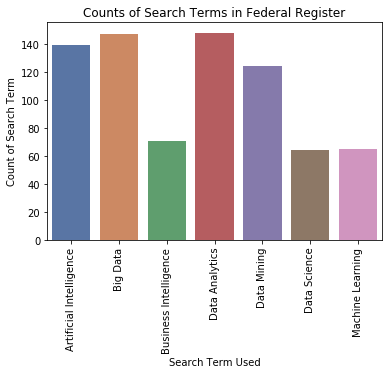

In [32]:
#set the color pallent
sns.set_palette('deep')

#count plot of all search terms (not unique documents)
cplt = sns.countplot(x="Search Term", data=master_df)

cplt.set_xticklabels(cplt.get_xticklabels(), rotation=90)
cplt.set_xlabel('Search Term Used')
cplt.set_ylabel('Count of Search Term')
cplt.set_title('Counts of Search Terms in Federal Register')

plt.savefig('counts_searchterm.png', bbox_inches = "tight")

[Text(0, 0, "['Health and Human Services Department', 'Centers for Medicare & Medicaid Services']"),
 Text(0, 0, "['Justice Department', 'Antitrust Division']"),
 Text(0, 0, "['Commerce Department', 'Patent and Trademark Office']"),
 Text(0, 0, "['Executive Office of the President']"),
 Text(0, 0, "['U.S.-China Economic and Security Review Commission']"),
 Text(0, 0, "['Labor Department', 'Occupational Safety and Health Administration']"),
 Text(0, 0, "['Health and Human Services Department', 'Food and Drug Administration']"),
 Text(0, 0, "['Consumer Financial Protection Bureau']"),
 Text(0, 0, "['Federal Deposit Insurance Corporation']"),
 Text(0, 0, "['Energy Department']"),
 Text(0, 0, "['Health and Human Services Department', 'Centers for Medicare & Medicaid Services', 'Office of the Secretary']"),
 Text(0, 0, "['National Science Foundation']"),
 Text(0, 0, "['Management and Budget Office']"),
 Text(0, 0, "['Library of Congress', 'Copyright Office, Library of Congress']"),
 Text(0,

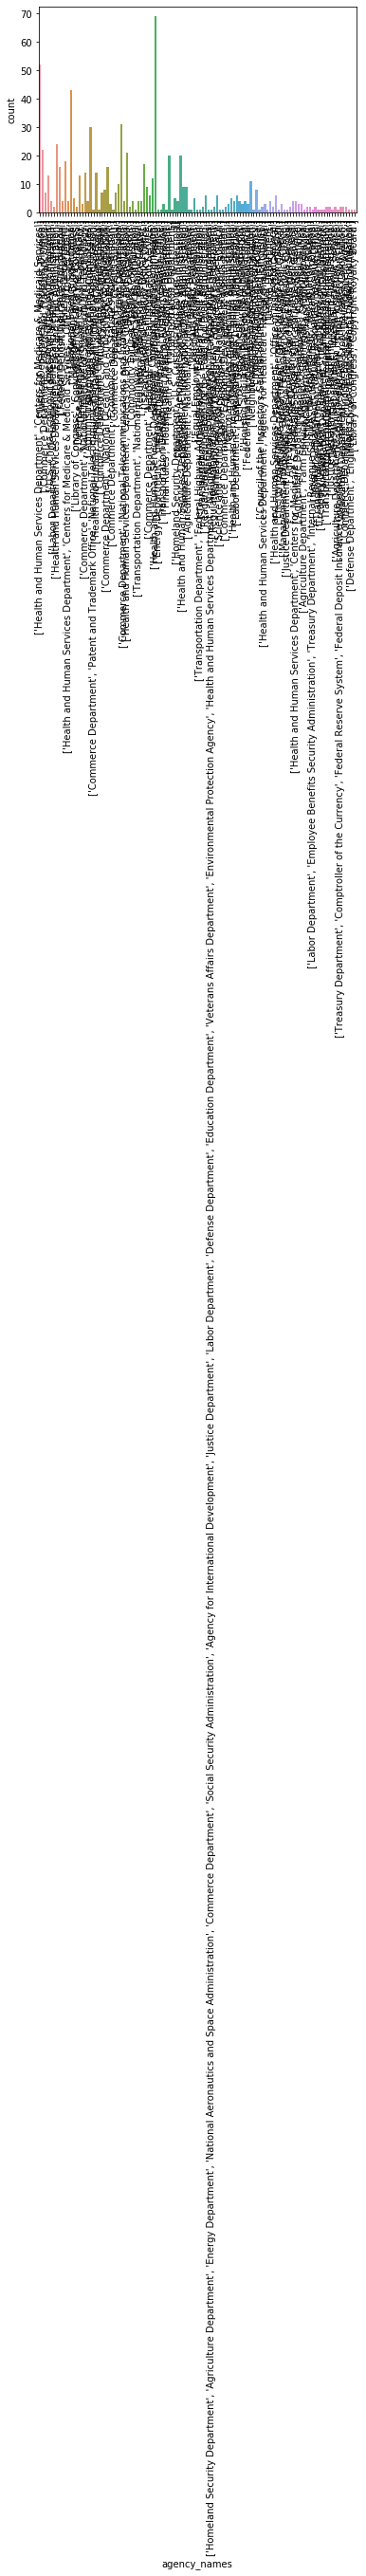

In [25]:
#count plot of all angecies (not unique documents)
cplt = sns.countplot(x="agency_names", data=master_df)

cplt.set_xticklabels(cplt.get_xticklabels(), rotation=90)

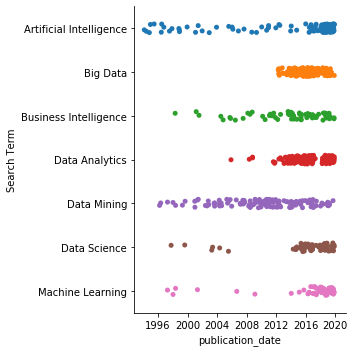

In [31]:
sns.catplot(x="publication_date", y="Search Term", data=master_df)

In [ ]:
master_df.plot.line(x= 'publication_date', y = 'Search Term')


# Cleaning the Data

In [23]:
master_df['agency_names']

0      ['Health and Human Services Department', 'Cent...
1           ['Justice Department', 'Antitrust Division']
2      ['Commerce Department', 'Patent and Trademark ...
3                  ['Executive Office of the President']
4      ['U.S.-China Economic and Security Review Comm...
5                  ['Executive Office of the President']
6      ['Labor Department', 'Occupational Safety and ...
7                  ['Executive Office of the President']
8      ['Commerce Department', 'Patent and Trademark ...
9      ['Health and Human Services Department', 'Food...
10              ['Consumer Financial Protection Bureau']
11              ['Consumer Financial Protection Bureau']
12              ['Consumer Financial Protection Bureau']
13                 ['Executive Office of the President']
14             ['Federal Deposit Insurance Corporation']
15                                 ['Energy Department']
16     ['Health and Human Services Department', 'Food...
17     ['Commerce Department', 

In [14]:
master_df['agency_main'] = master_df['agency_names'].str.split(',').str[0]

In [15]:
master_df['agency_main'] = master_df['agency_main'].str.replace('[^a-zA-Z]', ' ')

In [16]:
master_df['agency_main']

0                  Health and Human Services Department 
1                                    Justice Department 
2                                   Commerce Department 
3                    Executive Office of the President  
4        U S  China Economic and Security Review Comm...
5                    Executive Office of the President  
6                                      Labor Department 
7                    Executive Office of the President  
8                                   Commerce Department 
9                  Health and Human Services Department 
10                Consumer Financial Protection Bureau  
11                Consumer Financial Protection Bureau  
12                Consumer Financial Protection Bureau  
13                   Executive Office of the President  
14               Federal Deposit Insurance Corporation  
15                                   Energy Department  
16                 Health and Human Services Department 
17                             

In [22]:
master_df.dtypes

document_number             object
abstract                    object
action                      object
agencies                    object
agency_names                object
effective_on        datetime64[ns]
publication_date    datetime64[ns]
significant                 object
subtype                     object
title                       object
topics                      object
type                        object
Search Term                 object
agency_main                 object
dtype: object

In [19]:
master_df['publication_date'] =  pd.to_datetime(master_df['publication_date'])

In [21]:
master_df['effective_on'] =  pd.to_datetime(master_df['effective_on'])

In [33]:
#save cleaned DF as Pickle
master_df.to_pickle(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\master_df')